In [184]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import statistics
import os

In [185]:
dir=os.path.dirname(os.path.realpath('__file__')) #getting relative path
dirname = os.path.join(dir, 'ANDROID','gestures') #moving to training dataset for all gestures
list = os.listdir(dirname) #refrencing all files of dir into list
number_files = len(list) #checking content length of list
print (number_files,list)
df=pd.DataFrame(columns=["x","y","z","target"]) #dataframe which will have x,y,z variance of all gestures
for i in range(len(list)): #looping into each gesture
    f = open(list[i]+".txt", "a")
    subdir=os.path.join(dirname, list[i]) #moving to the data of each iteration of geature
    list1 = os.listdir(subdir)
    for j in range(len(list1)): #looping the training data
        file=os.path.join(subdir, list1[j])
        data = pd.read_csv(file, sep=" ", header=None) #reading traing data txt file: values seperated by space->dataframe
        data.columns = ["x", "y", "z"] #defining columns names
        #calculating variance, formula: summation(x**2)/total_elents- (mean**2)
        b={"x":(statistics.pstdev(data["x"])),
           "y":(statistics.pstdev(data["y"])),
           "z":(statistics.pstdev(data["z"])),
           "target":i} #target_id for each gesture using i
#         f.write("\n")
        df=df.append(b,ignore_index=True)
    f.close()
print(df)


4 ['bottom', 'left', 'right', 'top']
            x         y         z  target
0    0.451677  4.708538  1.189368     0.0
1    0.265277  3.646965  1.176538     0.0
2    0.792205  4.955873  2.088491     0.0
3    0.648069  4.453489  1.838908     0.0
4    0.622097  4.587544  1.951960     0.0
..        ...       ...       ...     ...
197  0.271143  0.137068  0.052074     3.0
198  0.840101  3.265574  1.302544     3.0
199  1.080684  3.539957  0.891173     3.0
200  0.866667  3.683992  1.255499     3.0
201  0.426025  3.992486  1.701297     3.0

[202 rows x 4 columns]


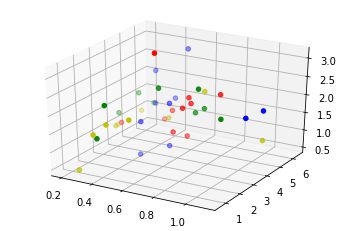

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'][:10], df['y'][:10], df['z'][:10], c='r', marker='o')
ax.scatter(df['x'][10:20], df['y'][10:20], df['z'][10:20], c='g', marker='o')
ax.scatter(df['x'][20:30], df['y'][20:30], df['z'][20:30], c='b', marker='o')
ax.scatter(df['x'][30:40], df['y'][30:40], df['z'][30:40], c='y', marker='o')
plt.show()

In [187]:
df=shuffle(df)

In [188]:
df.head()

,x,y,z,target
130,4.289560,0.538739,1.175481,2.0
62,2.080734,0.420585,1.329149,1.0
135,3.636633,0.315186,0.648930,2.0
65,2.769342,0.589096,3.939575,1.0
21,0.581370,3.669208,0.769378,0.0


In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X=df.drop(columns="target",axis=1)
Y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lm = LinearRegression()

In [193]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
pred = lm.predict(X_test)
print(pred)
print(y_test)

[1.40009574 1.73888305 1.49716148 1.40327853 1.28507775 1.54022402
 1.43232184 1.34918694 1.59042982 1.36446475 1.42220127 1.49482581
 2.04399742 1.63506004 1.25240666 1.80242352 1.63706993 1.87734172
 1.42103018 1.47056633 1.54471772 1.51679362 1.54807781 1.93021027
 1.34767994 1.64172741 1.58741147 1.59153977 1.43931791 1.29623533
 0.87840691 1.27554967 1.57616901 1.38144261 1.50570528 1.61446686
 1.241062   1.44384709 1.16916153 1.48712731 1.05013284]
16     0.0
59     1.0
158    3.0
47     0.0
74     1.0
154    3.0
165    3.0
56     1.0
49     0.0
166    3.0
201    3.0
79     1.0
105    2.0
183    3.0
11     0.0
192    3.0
134    2.0
80     1.0
4      0.0
20     0.0
58     1.0
27     0.0
168    3.0
130    2.0
52     1.0
182    3.0
30     0.0
31     0.0
5      0.0
187    3.0
68     1.0
155    3.0
196    3.0
186    3.0
36     0.0
123    2.0
37     0.0
176    3.0
18     0.0
13     0.0
94     1.0
Name: target, dtype: float64


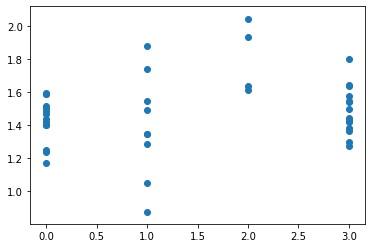

In [195]:
plt.scatter(y_test,pred)

In [196]:
from sklearn import metrics

In [197]:
metrics.explained_variance_score(y_test, pred)

0.03717282878805783

In [198]:
from sklearn.svm import SVC

In [199]:
svc=SVC()

In [200]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [201]:
pred=svc.predict(X_test)

In [202]:
from sklearn.metrics import classification_report

In [203]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64        14
         1.0       0.78      0.78      0.78         9
         2.0       0.67      1.00      0.80         4
         3.0       0.73      0.79      0.76        14

    accuracy                           0.73        41
   macro avg       0.73      0.78      0.74        41
weighted avg       0.73      0.73      0.73        41



In [204]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred))

0.7317073170731707


In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc=RandomForestClassifier(n_estimators=200)

In [207]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [208]:
rfc_pred=rfc.predict(X_test)

In [209]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.79      0.65        14
         1.0       1.00      0.89      0.94         9
         2.0       0.80      1.00      0.89         4
         3.0       0.62      0.36      0.45        14

    accuracy                           0.68        41
   macro avg       0.74      0.76      0.73        41
weighted avg       0.70      0.68      0.67        41



In [210]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred))

0.7317073170731707


# testing

In [211]:
dir=os.path.dirname(os.path.realpath('__file__')) #getting relative path
dirname = os.path.join(dir, 'ANDROID','test_data_here') #moving to training dataset for all gestures
list = os.listdir(dirname) #refrencing all files of dir into list
number_files = len(list) #checking content length of list
print (number_files,list)
df_test=pd.DataFrame(columns=["x","y","z"]) #dataframe which will have x,y,z variance of all gestures

for j in range(len(list)): #looping the training data
    file=os.path.join(subdir, list1[j])
    data = pd.read_csv(file, sep=" ", header=None) #reading traing data txt file: values seperated by space->dataframe
    data.columns = ["x", "y", "z"] #defining columns names
    #calculating variance, formula: summation(x**2)/total_elents- (mean**2)
    b={"x":(statistics.pstdev(data["x"])),
       "y":(statistics.pstdev(data["y"])),
       "z":(statistics.pstdev(data["z"])),} #target_id for each gesture using i
#         f.write("\n")
    df_test=df_test.append(b,ignore_index=True)
f.close()
print(df_test)

4 ['50.txt', '51.txt', '52.txt', '53.txt']
          x         y         z
0  0.287056  2.246601  0.412897
1  0.614931  2.663777  0.483466
2  0.965557  3.892081  1.273015
3  1.012033  3.984451  0.758984


In [212]:
pred=svc.predict(df_test)
print(pred)

[3. 3. 3. 3.]
